In [1]:
# load the data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import utils.n_fold_cv
df = pd.read_csv("Data\\train_data_3sec.csv", header=0)

# Extract features and labels
features = df.iloc[:, 2:-1].values  # Assuming your features start from the second column
labels = df.iloc[:, -1].values

# Convert labels to numeric format if needed
# For example, if labels are strings like 'blues', you can encode them into numbers
unique_labels = np.unique(labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
numeric_labels = np.array([label_mapping[label] for label in labels])

# Convert features to a numpy array
features_array = np.array(features, dtype=np.float32)

In [2]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_array)

In [3]:
X = normalized_features
disc = KBinsDiscretizer(n_bins=5, encode='ordinal')
disc.fit(X)
disc_features = disc.transform(X)

In [4]:
file_names = df.iloc[:,0].values
categories = np.array(['.'.join(name.split('.')[:2]) for name in file_names])
unique_values, counts = np.unique(categories, return_counts=True)
unique_categories_with_indices = list(enumerate(unique_values))
first_instance_indices = {category: np.where(categories == category)[0][0] for category in unique_values}
counts_dict = dict(zip(range(len(unique_values)), [(count, first_instance_indices[category]) for category, count in zip(unique_values, counts)]))
print(counts_dict)

{0: (10, 0), 1: (10, 10), 2: (10, 20), 3: (10, 30), 4: (10, 40), 5: (10, 50), 6: (10, 60), 7: (10, 70), 8: (10, 80), 9: (10, 90), 10: (10, 100), 11: (10, 110), 12: (10, 120), 13: (10, 130), 14: (10, 140), 15: (10, 150), 16: (10, 160), 17: (10, 170), 18: (10, 180), 19: (10, 190), 20: (10, 200), 21: (10, 210), 22: (10, 220), 23: (10, 230), 24: (10, 240), 25: (10, 250), 26: (10, 260), 27: (10, 270), 28: (10, 280), 29: (10, 290), 30: (10, 300), 31: (10, 310), 32: (10, 320), 33: (10, 330), 34: (10, 340), 35: (10, 350), 36: (10, 360), 37: (10, 370), 38: (10, 380), 39: (10, 390), 40: (10, 400), 41: (10, 410), 42: (10, 420), 43: (10, 430), 44: (10, 440), 45: (10, 450), 46: (10, 460), 47: (10, 470), 48: (10, 480), 49: (10, 490), 50: (10, 500), 51: (10, 510), 52: (10, 520), 53: (10, 530), 54: (10, 540), 55: (10, 550), 56: (10, 560), 57: (10, 570), 58: (10, 580), 59: (10, 590), 60: (10, 600), 61: (10, 610), 62: (10, 620), 63: (10, 630), 64: (10, 640), 65: (10, 650), 66: (10, 660), 67: (10, 670), 

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
X_train, X_val, y_train, y_val = next(utils.n_fold_cv.n_fold_cv(normalized_features, numeric_labels, counts_dict))
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
#cm.plot()
#plt.show()

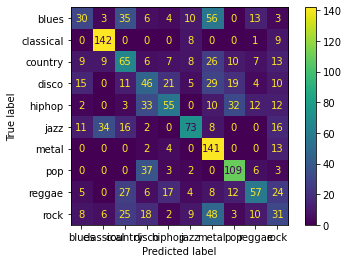

0.46841776110068795


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()
print(accuracy_score(y_val, y_pred))

In [65]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assume X is your feature matrix, y is your target variable
X_train, X_test, y_train, y_test = next(utils.n_fold_cv.n_fold_cv(disc_features, numeric_labels, counts_dict))#train_test_split(normalized_features, numeric_labels, test_size=0.2, random_state=42)

# Select the top k features with high mutual information
k_best = 30  # You can choose the number of top features you want to keep
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Naive Bayes on the selected features
nb_model = MultinomialNB()
nb_model.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred = nb_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.46028767979987495


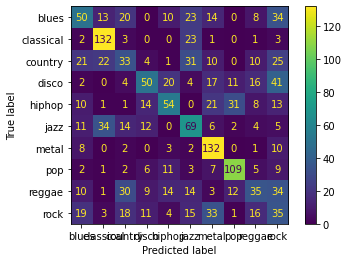

0.4371482176360225


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = nb_model.predict(selector.transform(X_val))
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()
print(accuracy_score(y_val, y_pred))

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Generate a hypothetical dataset
X, y = normalized_features, numeric_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = next(utils.n_fold_cv.n_fold_cv(disc_features, numeric_labels, counts_dict))#train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
classifier = MultinomialNB()

best_accuracy = 0
best_params = {}

# Iterate 10000 times
for _ in range(1000000):
    # Randomly choose the number of features
    k = np.random.randint(1, X.shape[1] + 1)

    # Randomly permute the features
    permutation = np.random.permutation(X.shape[1])[:k]

    # Perform feature selection
    X_train_selected = X_train[:, permutation]
    X_test_selected = X_test[:, permutation]
    

    # Train the classifier
    classifier.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test_selected)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best parameters if the current configuration is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'k': k, 'permutation': np.sort(permutation)}

# Print the best parameters and corresponding accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)




Best Parameters: {'k': 35, 'permutation': array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 13, 14, 15, 19, 21, 22, 23, 26,
       27, 28, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 46, 50, 52, 53,
       56])}
Best Accuracy: 0.5115697310819262


In [11]:
best_param = [ 0,  1,  2,  3,  5,  6,  7,  9, 10, 13, 14, 15, 19, 21, 22, 23, 26,
       27, 28, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 46, 50, 52, 53,
       56] #best_params['permutation']
X_train_selected = X_train[:, best_param]
X_test_selected = X_val[:, best_param]
classifier = MultinomialNB()
# Train the classifier
classifier.fit(X_train_selected, y_train)

MultinomialNB()

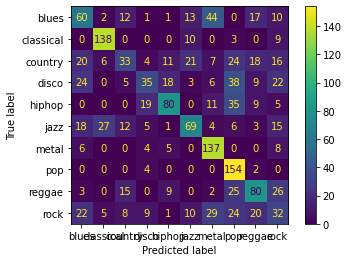

0.5115697310819262


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_val[:,best_param])
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot()

plt.show()
print(accuracy_score(y_val, y_pred))